# Sensor Degradation Filter BRAVO Data Visualization

## Assumed Sensor Accuracies are Over-/Under-estimated

A subset of robots' initial estimate of the sensor accuracy is either over- or under-estimated when compared to the actual accuracy. Only that subset of robots run the sensor filter.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import scripts.python.static_degradation_viz_module as sdvm

In [2]:
# Define colors for plots
colors = ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple", "dodgerblue", "mediumturquoise",]

"""
    Only flawed robots are plotted
"""

# Define common plotting function
def plot_data(json_data_lst, tfr, fig_title):

    num_flawed_robots = 0

    # Display parameter values
    print("Common parameter values:\n")

    # Plot time series
    fig1, ax1 = plt.subplots(2, 3, figsize=(14, 8))
    for i, json_data_obj in enumerate(json_data_lst):
        num_flawed_robot_lst = sorted(json_data_obj.num_flawed_robots, reverse=True)

        json_data_obj.print_common_data()
        print("\n")

        # Plot correct target fill ratio value
        ax1[0, i].axhline(tfr, color="black", linestyle="--")

        # Plot correct sensor accuracy value
        ax1[1, i].axhline(json_data_obj.correct_sensor_acc_b, color="black", linestyle="--")

        for j, num in enumerate(num_flawed_robot_lst):

            # Plot all the robots if every one of them has the filter running
            if json_data_obj.correct_robot_filter: num_flawed_robots = json_data_obj.num_robots
            else: num_flawed_robots = num

            for trial_ind in range(json_data_obj.num_trials):

                # Plot informed estimate
                [
                    ax1[0, i].plot(
                        np.arange(0, json_data_obj.num_steps+1),
                        json_data_obj.data[num][trial_ind, -k, :, 0].flatten(),
                        c=colors[len(num_flawed_robot_lst)-j-1], # colors differentiate the number of flawed robots
                        lw=(3-j*0.4)
                    ) for k in range(1, num_flawed_robots+1)
                ]

                # Plot sensor estimate
                [
                    ax1[1, i].plot(
                        np.arange(0, json_data_obj.num_steps+1),
                        json_data_obj.data[num][trial_ind, -k, :, 1].flatten(),
                        c=colors[len(num_flawed_robot_lst)-j-1], # colors differentiate the number of flawed robots
                        lw=(3-j*0.4)
                    ) for k in range(1, num_flawed_robots+1)
                ]

        # Set title and labels
        ax1[0, i].set_title(
            "$w^* = {0}, \hat{{w}}_0 = {1}, \Delta w_0 = {2}$".format(
                json_data_obj.correct_sensor_acc_b,
                json_data_obj.flawed_sensor_acc_b,
                np.round(json_data_obj.flawed_sensor_acc_b - json_data_obj.correct_sensor_acc_b, 2)
            )
        )
        ax1[0, i].set_ylabel("$x$")
        ax1[1, i].set_ylabel("$\hat{w}$")
        ax1[1, i].set_xlabel("Observation rounds")

        # Set limits
        ax1[0, i].set_ylim([-0.01, 1.01])
        ax1[1, i].set_ylim([-0.01, 1.01])

        # Set grids
        ax1[0, i].grid()
        ax1[1, i].grid()


    labels = ["{0}".format(i) for i in num_flawed_robot_lst]
    handles = [mlines.Line2D([], [], color=colors[len(labels)-i-1], linestyle="-", markersize=10, label=lab) for i, lab in enumerate(labels)]
    fig1.legend(handles, labels, title="# flawed robots", loc="center left", bbox_to_anchor=(1, 0.5))

    fig1.suptitle(fig_title)

    plt.tight_layout()

### Case 1: Correct Robots Do Not Update Their Sensor Accuracies

Robots with the correct assumed sensor accuracy (_i.e.,_ the non-flawed robots) do not run the sensor filter.

In [3]:
# Correct assumed accuracy paths
case1_under_paths = [
    "../data/042624_161431_t3_s10000_tfr550_flw1-1-5_flwb550_flww550_corb750_corw750_commsp10_filtp1000_corfilt0",
    "../data/042624_161721_t3_s10000_tfr750_flw1-1-5_flwb550_flww550_corb750_corw750_commsp10_filtp1000_corfilt0",
    "../data/042624_162013_t3_s10000_tfr950_flw1-1-5_flwb550_flww550_corb750_corw750_commsp10_filtp1000_corfilt0",
    "../data/042624_162304_t3_s10000_tfr550_flw1-1-5_flwb550_flww550_corb950_corw950_commsp10_filtp1000_corfilt0",
    "../data/042624_162551_t3_s10000_tfr750_flw1-1-5_flwb550_flww550_corb950_corw950_commsp10_filtp1000_corfilt0",
    "../data/042624_162852_t3_s10000_tfr950_flw1-1-5_flwb550_flww550_corb950_corw950_commsp10_filtp1000_corfilt0",
    "../data/042624_164011_t3_s10000_tfr550_flw1-1-5_flwb750_flww750_corb950_corw950_commsp10_filtp1000_corfilt0",
    "../data/042624_164259_t3_s10000_tfr750_flw1-1-5_flwb750_flww750_corb950_corw950_commsp10_filtp1000_corfilt0",
    "../data/042624_164550_t3_s10000_tfr950_flw1-1-5_flwb750_flww750_corb950_corw950_commsp10_filtp1000_corfilt0"
]

case1_over_paths = [
    "../data/042624_163144_t3_s10000_tfr550_flw1-1-5_flwb750_flww750_corb550_corw550_commsp10_filtp1000_corfilt0",
    "../data/042624_163433_t3_s10000_tfr750_flw1-1-5_flwb750_flww750_corb550_corw550_commsp10_filtp1000_corfilt0",
    "../data/042624_163719_t3_s10000_tfr950_flw1-1-5_flwb750_flww750_corb550_corw550_commsp10_filtp1000_corfilt0",
    "../data/042624_164841_t3_s10000_tfr550_flw1-1-5_flwb950_flww950_corb550_corw550_commsp10_filtp1000_corfilt0",
    "../data/042624_165150_t3_s10000_tfr750_flw1-1-5_flwb950_flww950_corb550_corw550_commsp10_filtp1000_corfilt0",
    "../data/042624_165545_t3_s10000_tfr950_flw1-1-5_flwb950_flww950_corb550_corw550_commsp10_filtp1000_corfilt0",
    "../data/042624_165837_t3_s10000_tfr550_flw1-1-5_flwb950_flww950_corb750_corw750_commsp10_filtp1000_corfilt0",
    "../data/042624_170127_t3_s10000_tfr750_flw1-1-5_flwb950_flww950_corb750_corw750_commsp10_filtp1000_corfilt0",
    "../data/042624_170423_t3_s10000_tfr950_flw1-1-5_flwb950_flww950_corb750_corw750_commsp10_filtp1000_corfilt0"
]

case1_under_tfr550_paths = [
    "../data/042624_161431_t3_s10000_tfr550_flw1-1-5_flwb550_flww550_corb750_corw750_commsp10_filtp1000_corfilt0",
    "../data/042624_162304_t3_s10000_tfr550_flw1-1-5_flwb550_flww550_corb950_corw950_commsp10_filtp1000_corfilt0",
    "../data/042624_164011_t3_s10000_tfr550_flw1-1-5_flwb750_flww750_corb950_corw950_commsp10_filtp1000_corfilt0"
]
case1_under_tfr750_paths = [
    "../data/042624_161721_t3_s10000_tfr750_flw1-1-5_flwb550_flww550_corb750_corw750_commsp10_filtp1000_corfilt0",
    "../data/042624_162551_t3_s10000_tfr750_flw1-1-5_flwb550_flww550_corb950_corw950_commsp10_filtp1000_corfilt0",
    "../data/042624_164259_t3_s10000_tfr750_flw1-1-5_flwb750_flww750_corb950_corw950_commsp10_filtp1000_corfilt0"
]
case1_under_tfr950_paths = [
    "../data/042624_162013_t3_s10000_tfr950_flw1-1-5_flwb550_flww550_corb750_corw750_commsp10_filtp1000_corfilt0",
    "../data/042624_162852_t3_s10000_tfr950_flw1-1-5_flwb550_flww550_corb950_corw950_commsp10_filtp1000_corfilt0",
    "../data/042624_164550_t3_s10000_tfr950_flw1-1-5_flwb750_flww750_corb950_corw950_commsp10_filtp1000_corfilt0"
]

case1_over_tfr550_paths = [
    "../data/042624_163144_t3_s10000_tfr550_flw1-1-5_flwb750_flww750_corb550_corw550_commsp10_filtp1000_corfilt0",
    "../data/042624_164841_t3_s10000_tfr550_flw1-1-5_flwb950_flww950_corb550_corw550_commsp10_filtp1000_corfilt0",
    "../data/042624_165837_t3_s10000_tfr550_flw1-1-5_flwb950_flww950_corb750_corw750_commsp10_filtp1000_corfilt0"
]
case1_over_tfr750_paths = [
    "../data/042624_163433_t3_s10000_tfr750_flw1-1-5_flwb750_flww750_corb550_corw550_commsp10_filtp1000_corfilt0",
    "../data/042624_165150_t3_s10000_tfr750_flw1-1-5_flwb950_flww950_corb550_corw550_commsp10_filtp1000_corfilt0",
    "../data/042624_170127_t3_s10000_tfr750_flw1-1-5_flwb950_flww950_corb750_corw750_commsp10_filtp1000_corfilt0"
]
case1_over_tfr950_paths = [
    "../data/042624_163719_t3_s10000_tfr950_flw1-1-5_flwb750_flww750_corb550_corw550_commsp10_filtp1000_corfilt0",
    "../data/042624_165545_t3_s10000_tfr950_flw1-1-5_flwb950_flww950_corb550_corw550_commsp10_filtp1000_corfilt0",
    "../data/042624_170423_t3_s10000_tfr950_flw1-1-5_flwb950_flww950_corb750_corw750_commsp10_filtp1000_corfilt0"
]

# Load data
case1_under_tfr550_json_data = [sdvm.StaticDegradationJsonData(p) for p in case1_under_tfr550_paths]
case1_under_tfr750_json_data = [sdvm.StaticDegradationJsonData(p) for p in case1_under_tfr750_paths]
case1_under_tfr950_json_data = [sdvm.StaticDegradationJsonData(p) for p in case1_under_tfr950_paths]

case1_over_tfr550_json_data = [sdvm.StaticDegradationJsonData(p) for p in case1_over_tfr550_paths]
case1_over_tfr750_json_data = [sdvm.StaticDegradationJsonData(p) for p in case1_over_tfr750_paths]
case1_over_tfr950_json_data = [sdvm.StaticDegradationJsonData(p) for p in case1_over_tfr950_paths]

#### Case 1a: Underestimated Initial Accuracy

Robots' assumed initial accuracy is underestimated.

Common parameter values:

num_trials: 3
num_robots: 10
num_correct_robots: [9, 7, 5, 8, 6]
num_flawed_robots: [1, 3, 5, 2, 4]
num_steps: 10000
sensor_filter_period: 1000
comms_period: 10
tfr: 0.55
flawed_sensor_acc_b: 0.55
flawed_sensor_acc_w: 0.55
correct_sensor_acc_b: 0.75
correct_sensor_acc_w: 0.75
fully_connected: True
correct_robot_filter: False
filter_specific_params: {'type2ErrProb': 0.1}


num_trials: 3
num_robots: 10
num_correct_robots: [9, 7, 5, 8, 6]
num_flawed_robots: [1, 3, 5, 2, 4]
num_steps: 10000
sensor_filter_period: 1000
comms_period: 10
tfr: 0.55
flawed_sensor_acc_b: 0.55
flawed_sensor_acc_w: 0.55
correct_sensor_acc_b: 0.95
correct_sensor_acc_w: 0.95
fully_connected: True
correct_robot_filter: False
filter_specific_params: {'type2ErrProb': 0.1}


num_trials: 3
num_robots: 10
num_correct_robots: [9, 7, 5, 8, 6]
num_flawed_robots: [1, 3, 5, 2, 4]
num_steps: 10000
sensor_filter_period: 1000
comms_period: 10
tfr: 0.55
flawed_sensor_acc_b: 0.75
flawed_sensor_acc_w: 0.75
c

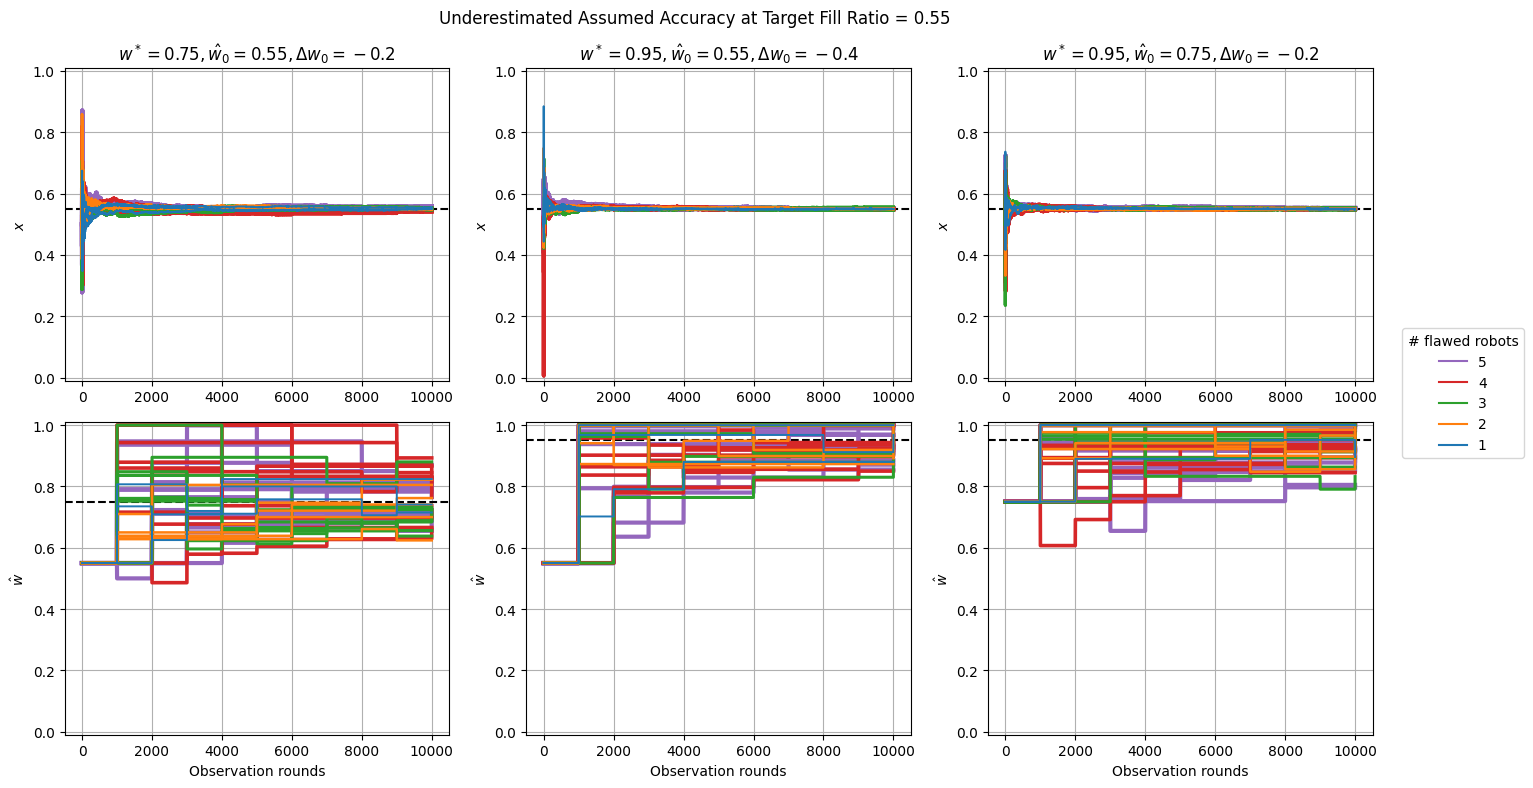

In [4]:
tfr = 0.55
plot_data(case1_under_tfr550_json_data, tfr, "Underestimated Assumed Accuracy at Target Fill Ratio = {0}".format(tfr))

Common parameter values:

num_trials: 3
num_robots: 10
num_correct_robots: [9, 7, 5, 8, 6]
num_flawed_robots: [1, 3, 5, 2, 4]
num_steps: 10000
sensor_filter_period: 1000
comms_period: 10
tfr: 0.75
flawed_sensor_acc_b: 0.55
flawed_sensor_acc_w: 0.55
correct_sensor_acc_b: 0.75
correct_sensor_acc_w: 0.75
fully_connected: True
correct_robot_filter: False
filter_specific_params: {'type2ErrProb': 0.1}


num_trials: 3
num_robots: 10
num_correct_robots: [9, 7, 5, 8, 6]
num_flawed_robots: [1, 3, 5, 2, 4]
num_steps: 10000
sensor_filter_period: 1000
comms_period: 10
tfr: 0.75
flawed_sensor_acc_b: 0.55
flawed_sensor_acc_w: 0.55
correct_sensor_acc_b: 0.95
correct_sensor_acc_w: 0.95
fully_connected: True
correct_robot_filter: False
filter_specific_params: {'type2ErrProb': 0.1}


num_trials: 3
num_robots: 10
num_correct_robots: [9, 7, 5, 8, 6]
num_flawed_robots: [1, 3, 5, 2, 4]
num_steps: 10000
sensor_filter_period: 1000
comms_period: 10
tfr: 0.75
flawed_sensor_acc_b: 0.75
flawed_sensor_acc_w: 0.75
c

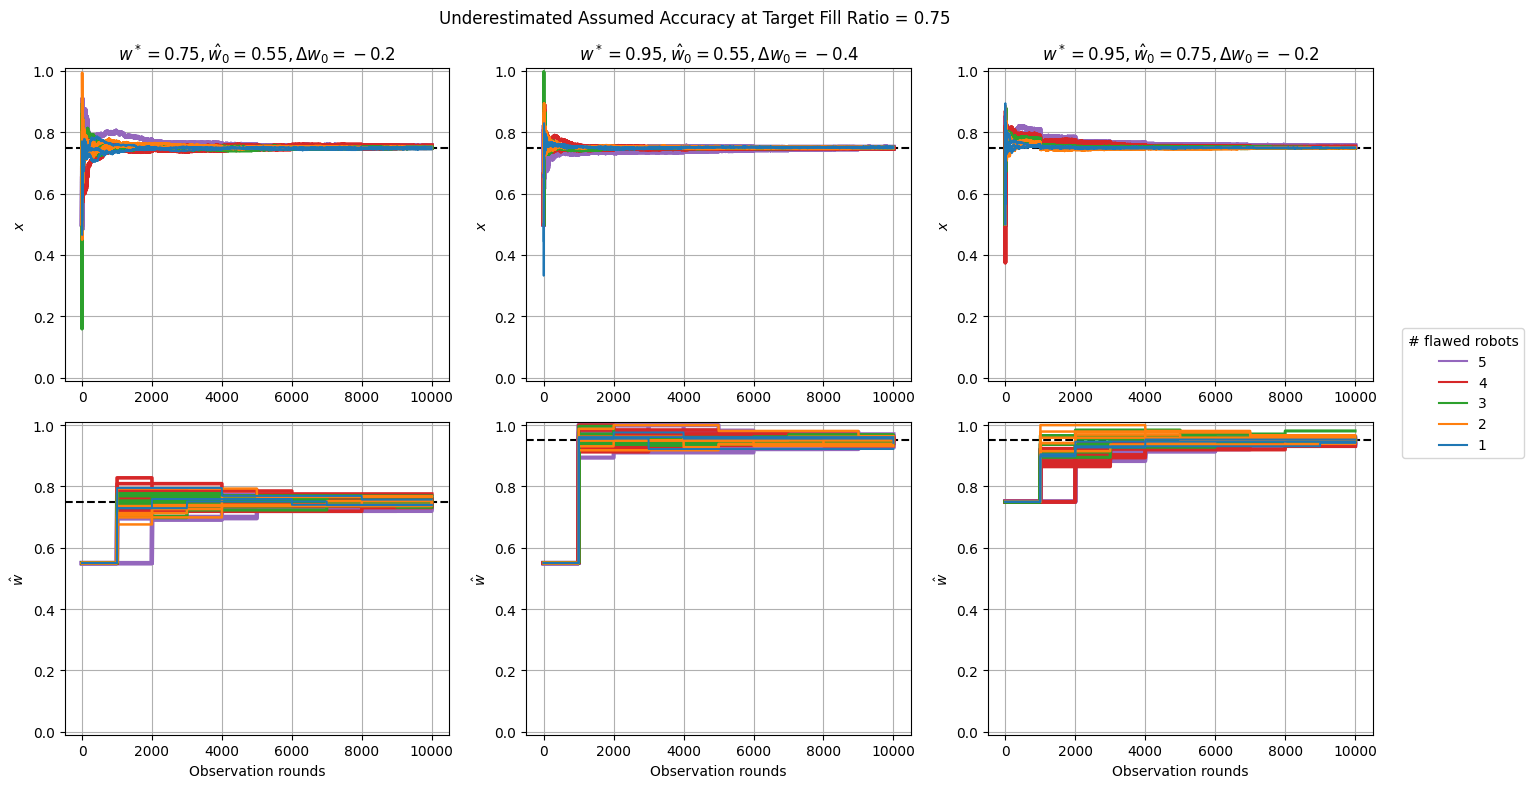

In [5]:
tfr = 0.75
plot_data(case1_under_tfr750_json_data, tfr, "Underestimated Assumed Accuracy at Target Fill Ratio = {0}".format(tfr))

Common parameter values:

num_trials: 3
num_robots: 10
num_correct_robots: [9, 7, 5, 8, 6]
num_flawed_robots: [1, 3, 5, 2, 4]
num_steps: 10000
sensor_filter_period: 1000
comms_period: 10
tfr: 0.95
flawed_sensor_acc_b: 0.55
flawed_sensor_acc_w: 0.55
correct_sensor_acc_b: 0.75
correct_sensor_acc_w: 0.75
fully_connected: True
correct_robot_filter: False
filter_specific_params: {'type2ErrProb': 0.1}


num_trials: 3
num_robots: 10
num_correct_robots: [9, 7, 5, 8, 6]
num_flawed_robots: [1, 3, 5, 2, 4]
num_steps: 10000
sensor_filter_period: 1000
comms_period: 10
tfr: 0.95
flawed_sensor_acc_b: 0.55
flawed_sensor_acc_w: 0.55
correct_sensor_acc_b: 0.95
correct_sensor_acc_w: 0.95
fully_connected: True
correct_robot_filter: False
filter_specific_params: {'type2ErrProb': 0.1}


num_trials: 3
num_robots: 10
num_correct_robots: [9, 7, 5, 8, 6]
num_flawed_robots: [1, 3, 5, 2, 4]
num_steps: 10000
sensor_filter_period: 1000
comms_period: 10
tfr: 0.95
flawed_sensor_acc_b: 0.75
flawed_sensor_acc_w: 0.75
c

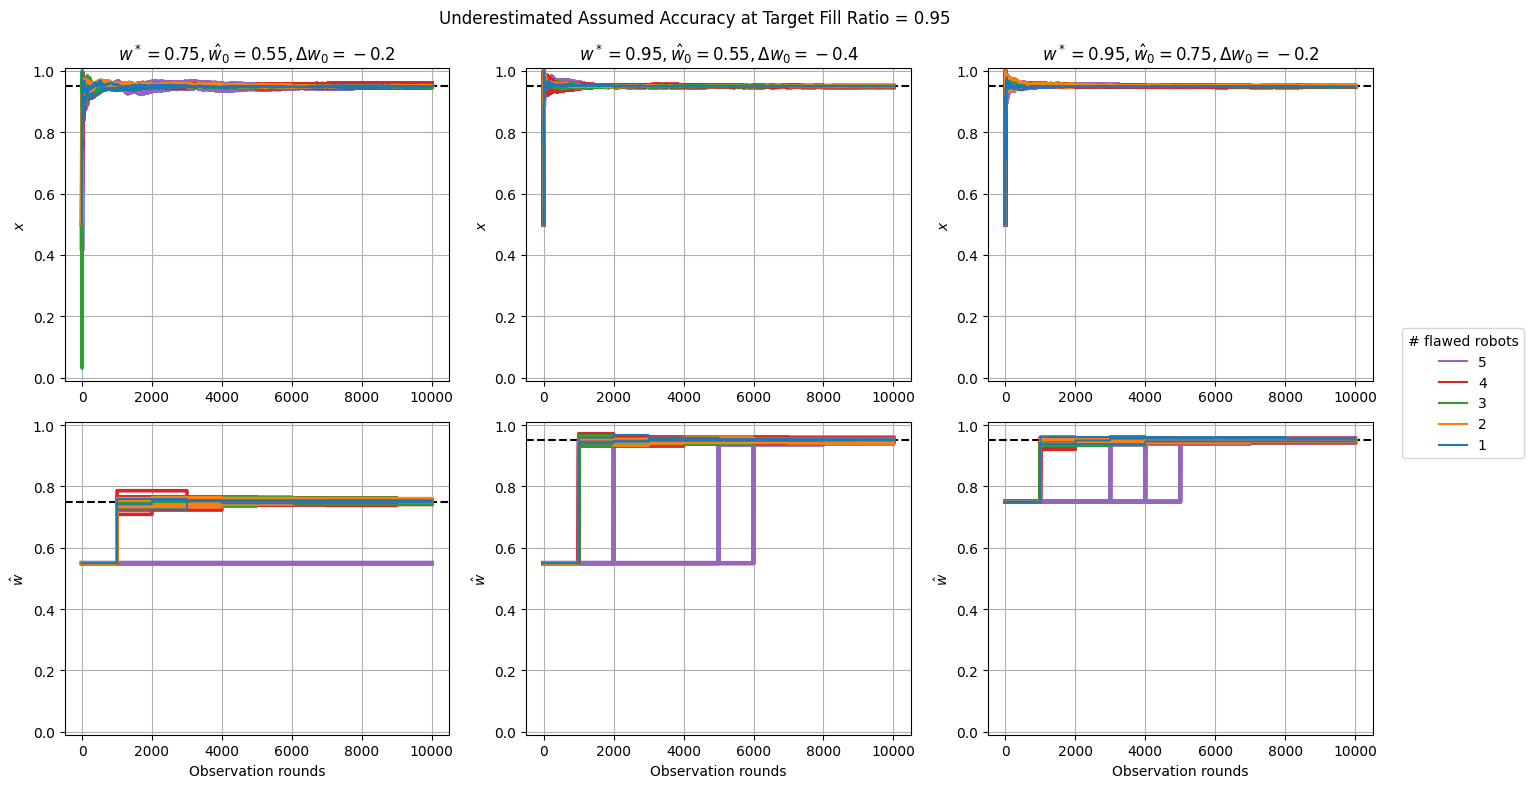

In [6]:
tfr = 0.95
plot_data(case1_under_tfr950_json_data, tfr, "Underestimated Assumed Accuracy at Target Fill Ratio = {0}".format(tfr))

#### Case 1b: Overestimated Initial Accuracy

Robots' assumed initial accuracy is overestimated.

Common parameter values:

num_trials: 3
num_robots: 10
num_correct_robots: [9, 7, 5, 8, 6]
num_flawed_robots: [1, 3, 5, 2, 4]
num_steps: 10000
sensor_filter_period: 1000
comms_period: 10
tfr: 0.55
flawed_sensor_acc_b: 0.75
flawed_sensor_acc_w: 0.75
correct_sensor_acc_b: 0.55
correct_sensor_acc_w: 0.55
fully_connected: True
correct_robot_filter: False
filter_specific_params: {'type2ErrProb': 0.1}


num_trials: 3
num_robots: 10
num_correct_robots: [9, 7, 5, 8, 6]
num_flawed_robots: [1, 3, 5, 2, 4]
num_steps: 10000
sensor_filter_period: 1000
comms_period: 10
tfr: 0.55
flawed_sensor_acc_b: 0.95
flawed_sensor_acc_w: 0.95
correct_sensor_acc_b: 0.55
correct_sensor_acc_w: 0.55
fully_connected: True
correct_robot_filter: False
filter_specific_params: {'type2ErrProb': 0.1}


num_trials: 3
num_robots: 10
num_correct_robots: [9, 7, 5, 8, 6]
num_flawed_robots: [1, 3, 5, 2, 4]
num_steps: 10000
sensor_filter_period: 1000
comms_period: 10
tfr: 0.55
flawed_sensor_acc_b: 0.95
flawed_sensor_acc_w: 0.95
c

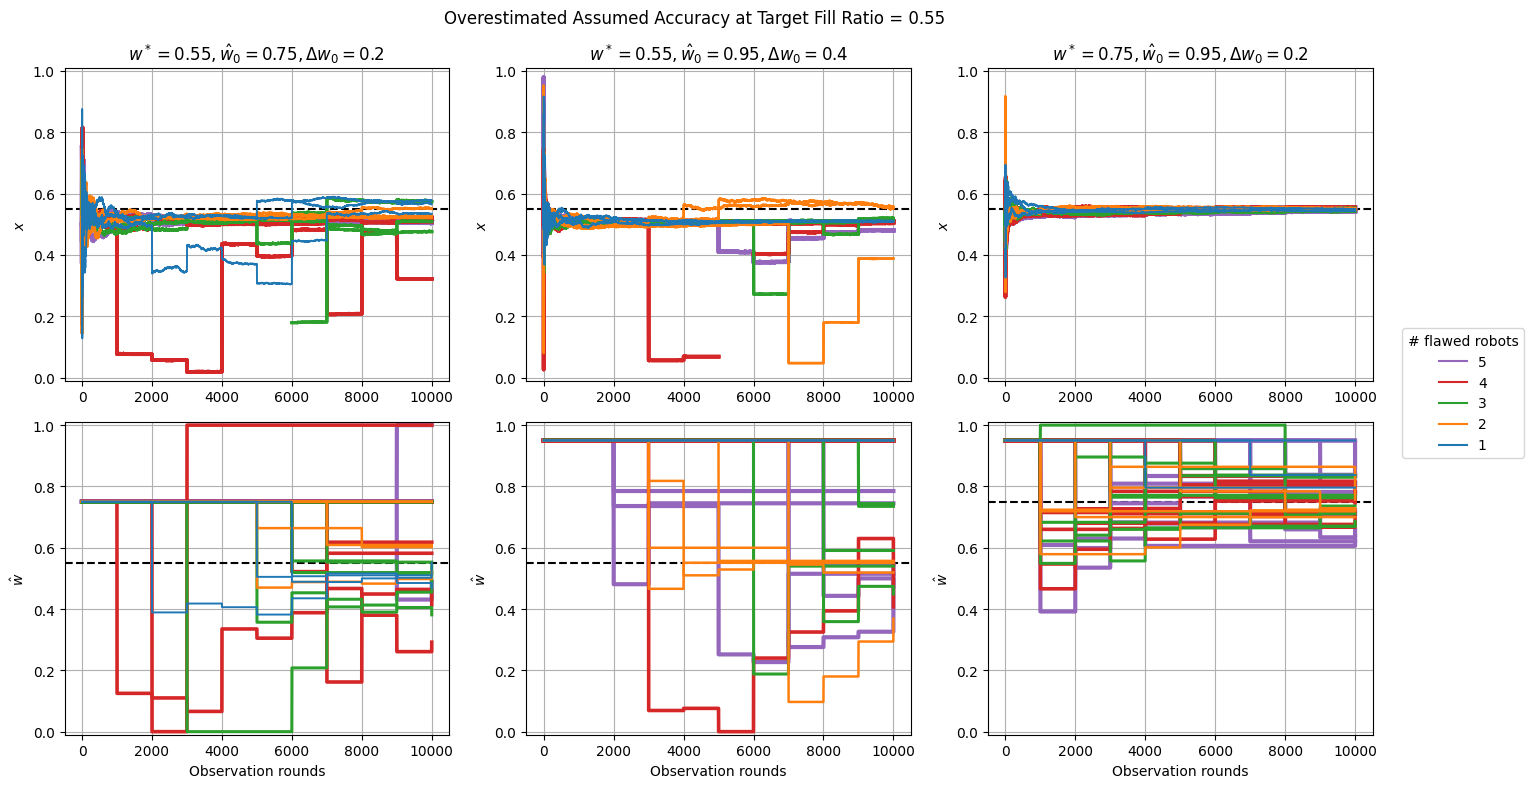

In [7]:
tfr = 0.55
plot_data(case1_over_tfr550_json_data, tfr, "Overestimated Assumed Accuracy at Target Fill Ratio = {0}".format(tfr))

Common parameter values:

num_trials: 3
num_robots: 10
num_correct_robots: [9, 7, 5, 8, 6]
num_flawed_robots: [1, 3, 5, 2, 4]
num_steps: 10000
sensor_filter_period: 1000
comms_period: 10
tfr: 0.75
flawed_sensor_acc_b: 0.75
flawed_sensor_acc_w: 0.75
correct_sensor_acc_b: 0.55
correct_sensor_acc_w: 0.55
fully_connected: True
correct_robot_filter: False
filter_specific_params: {'type2ErrProb': 0.1}


num_trials: 3
num_robots: 10
num_correct_robots: [9, 7, 5, 8, 6]
num_flawed_robots: [1, 3, 5, 2, 4]
num_steps: 10000
sensor_filter_period: 1000
comms_period: 10
tfr: 0.75
flawed_sensor_acc_b: 0.95
flawed_sensor_acc_w: 0.95
correct_sensor_acc_b: 0.55
correct_sensor_acc_w: 0.55
fully_connected: True
correct_robot_filter: False
filter_specific_params: {'type2ErrProb': 0.1}


num_trials: 3
num_robots: 10
num_correct_robots: [9, 7, 5, 8, 6]
num_flawed_robots: [1, 3, 5, 2, 4]
num_steps: 10000
sensor_filter_period: 1000
comms_period: 10
tfr: 0.75
flawed_sensor_acc_b: 0.95
flawed_sensor_acc_w: 0.95
c

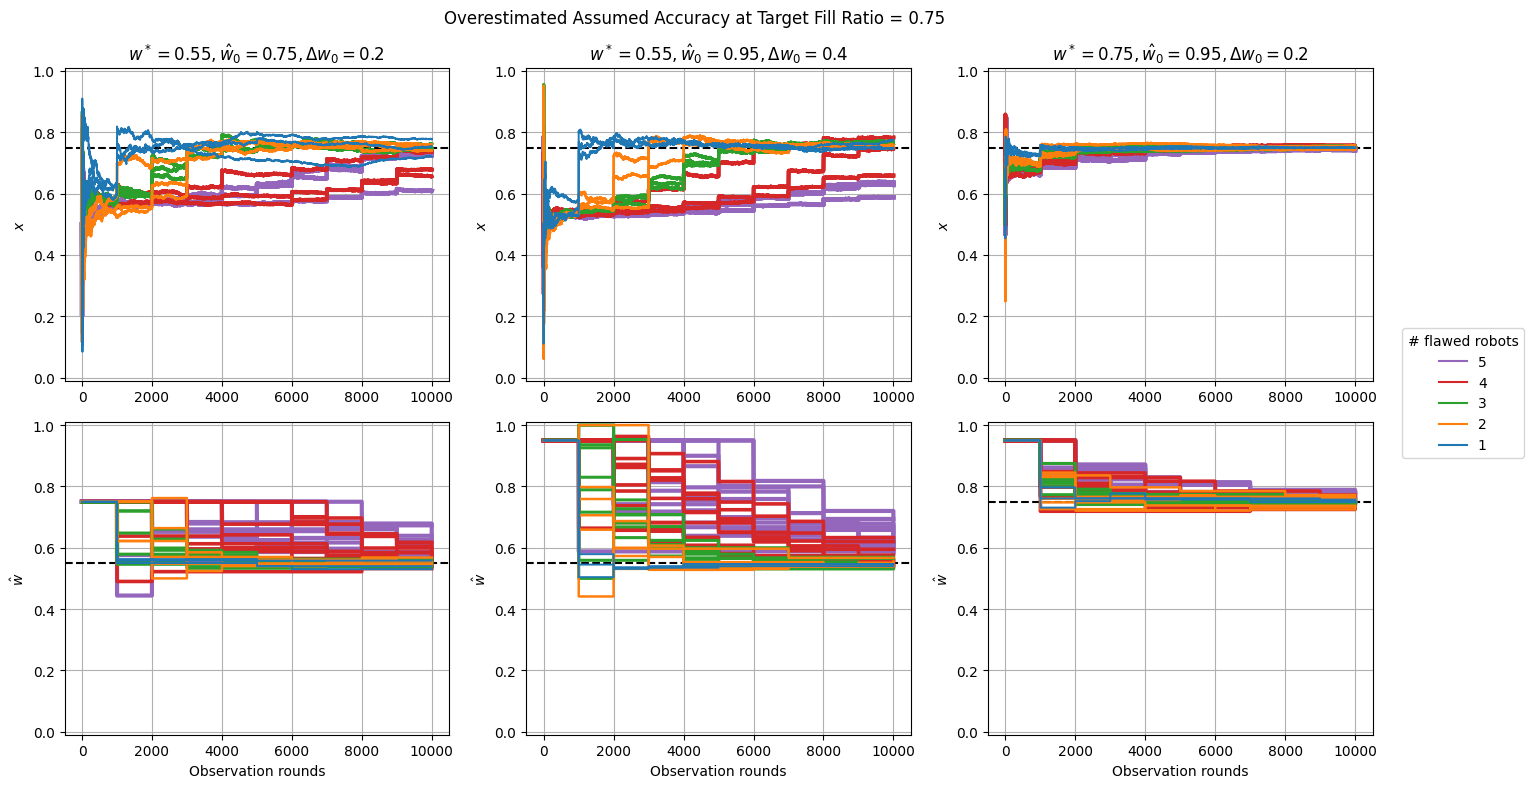

In [8]:
tfr = 0.75
plot_data(case1_over_tfr750_json_data, tfr, "Overestimated Assumed Accuracy at Target Fill Ratio = {0}".format(tfr))

Common parameter values:

num_trials: 3
num_robots: 10
num_correct_robots: [9, 7, 5, 8, 6]
num_flawed_robots: [1, 3, 5, 2, 4]
num_steps: 10000
sensor_filter_period: 1000
comms_period: 10
tfr: 0.95
flawed_sensor_acc_b: 0.75
flawed_sensor_acc_w: 0.75
correct_sensor_acc_b: 0.55
correct_sensor_acc_w: 0.55
fully_connected: True
correct_robot_filter: False
filter_specific_params: {'type2ErrProb': 0.1}


num_trials: 3
num_robots: 10
num_correct_robots: [9, 7, 5, 8, 6]
num_flawed_robots: [1, 3, 5, 2, 4]
num_steps: 10000
sensor_filter_period: 1000
comms_period: 10
tfr: 0.95
flawed_sensor_acc_b: 0.95
flawed_sensor_acc_w: 0.95
correct_sensor_acc_b: 0.55
correct_sensor_acc_w: 0.55
fully_connected: True
correct_robot_filter: False
filter_specific_params: {'type2ErrProb': 0.1}


num_trials: 3
num_robots: 10
num_correct_robots: [9, 7, 5, 8, 6]
num_flawed_robots: [1, 3, 5, 2, 4]
num_steps: 10000
sensor_filter_period: 1000
comms_period: 10
tfr: 0.95
flawed_sensor_acc_b: 0.95
flawed_sensor_acc_w: 0.95
c

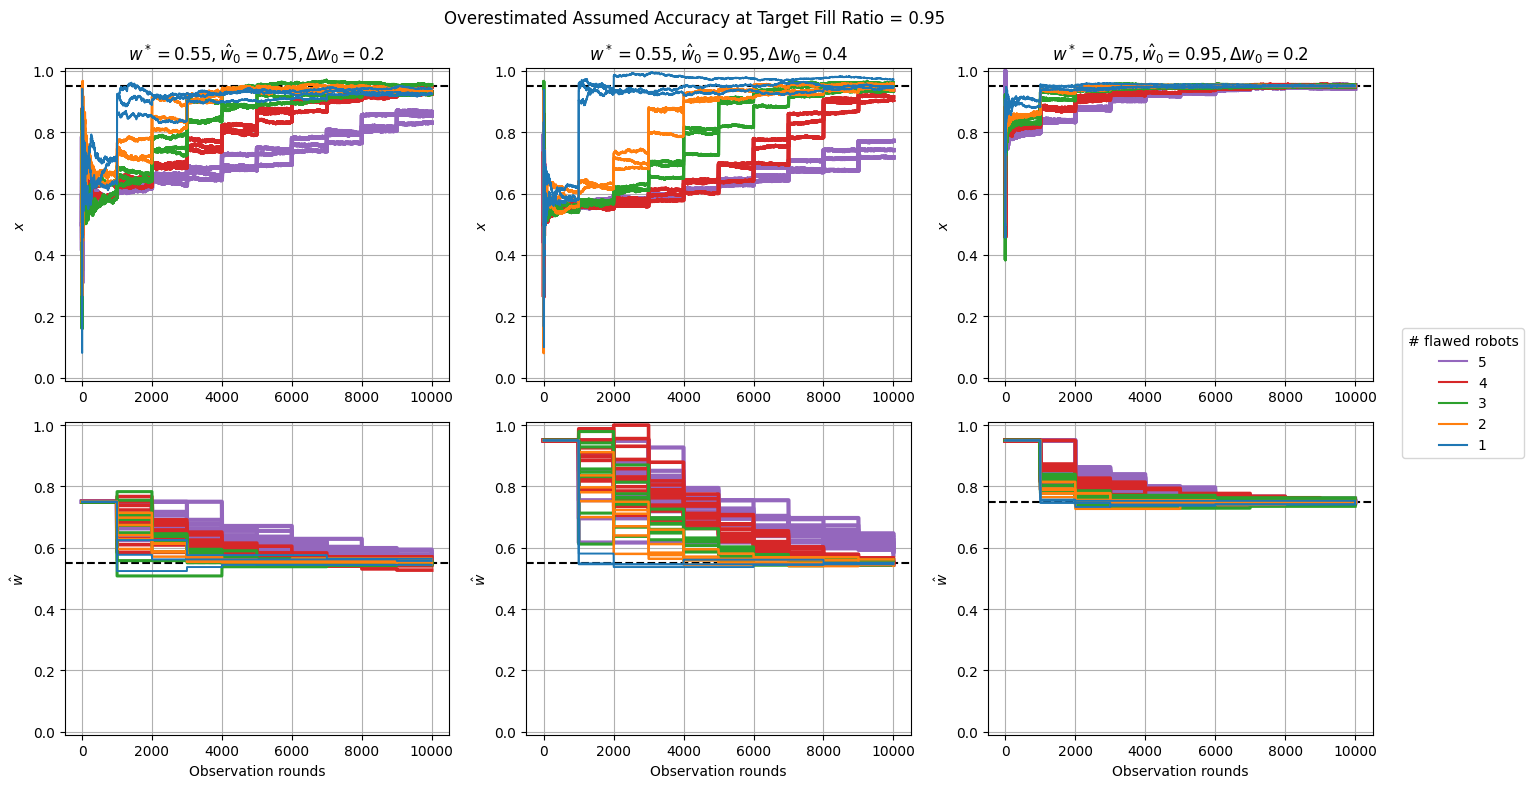

In [9]:
tfr = 0.95
plot_data(case1_over_tfr950_json_data, tfr, "Overestimated Assumed Accuracy at Target Fill Ratio = {0}".format(tfr))

### Case 2: Correct Robots Update Their Sensor Accuracies

Robots with the correct assumed sensor accuracy (_i.e.,_ the non-flawed robots) run the sensor filter. This means that their assumed accuracies may deviate from the true accuracy at a later time.

In [10]:
case2_under_paths = [
    "../data/042624_172458_t3_s10000_tfr550_flw1-1-5_flwb550_flww550_corb750_corw750_commsp10_filtp1000_corfilt1",
    "../data/042624_172835_t3_s10000_tfr750_flw1-1-5_flwb550_flww550_corb750_corw750_commsp10_filtp1000_corfilt1",
    "../data/042624_173216_t3_s10000_tfr950_flw1-1-5_flwb550_flww550_corb750_corw750_commsp10_filtp1000_corfilt1",
    "../data/042624_173551_t3_s10000_tfr550_flw1-1-5_flwb550_flww550_corb950_corw950_commsp10_filtp1000_corfilt1",
    "../data/042624_173923_t3_s10000_tfr750_flw1-1-5_flwb550_flww550_corb950_corw950_commsp10_filtp1000_corfilt1",
    "../data/042624_174258_t3_s10000_tfr950_flw1-1-5_flwb550_flww550_corb950_corw950_commsp10_filtp1000_corfilt1",
    "../data/042624_175713_t3_s10000_tfr550_flw1-1-5_flwb750_flww750_corb950_corw950_commsp10_filtp1000_corfilt1",
    "../data/042624_180044_t3_s10000_tfr750_flw1-1-5_flwb750_flww750_corb950_corw950_commsp10_filtp1000_corfilt1",
    "../data/042624_180414_t3_s10000_tfr950_flw1-1-5_flwb750_flww750_corb950_corw950_commsp10_filtp1000_corfilt1"
]

case2_over_paths = [
    "../data/042624_174635_t3_s10000_tfr550_flw1-1-5_flwb750_flww750_corb550_corw550_commsp10_filtp1000_corfilt1",
    "../data/042624_175010_t3_s10000_tfr750_flw1-1-5_flwb750_flww750_corb550_corw550_commsp10_filtp1000_corfilt1",
    "../data/042624_175341_t3_s10000_tfr950_flw1-1-5_flwb750_flww750_corb550_corw550_commsp10_filtp1000_corfilt1",
    "../data/042624_180748_t3_s10000_tfr550_flw1-1-5_flwb950_flww950_corb550_corw550_commsp10_filtp1000_corfilt1",
    "../data/042624_181128_t3_s10000_tfr750_flw1-1-5_flwb950_flww950_corb550_corw550_commsp10_filtp1000_corfilt1",
    "../data/042624_181514_t3_s10000_tfr950_flw1-1-5_flwb950_flww950_corb550_corw550_commsp10_filtp1000_corfilt1",
    "../data/042624_181847_t3_s10000_tfr550_flw1-1-5_flwb950_flww950_corb750_corw750_commsp10_filtp1000_corfilt1",
    "../data/042624_182220_t3_s10000_tfr750_flw1-1-5_flwb950_flww950_corb750_corw750_commsp10_filtp1000_corfilt1",
    "../data/042624_182555_t3_s10000_tfr950_flw1-1-5_flwb950_flww950_corb750_corw750_commsp10_filtp1000_corfilt1"
]

case2_under_tfr550_paths = [
    "../data/042624_172458_t3_s10000_tfr550_flw1-1-5_flwb550_flww550_corb750_corw750_commsp10_filtp1000_corfilt1",
    "../data/042624_173551_t3_s10000_tfr550_flw1-1-5_flwb550_flww550_corb950_corw950_commsp10_filtp1000_corfilt1",
    "../data/042624_175713_t3_s10000_tfr550_flw1-1-5_flwb750_flww750_corb950_corw950_commsp10_filtp1000_corfilt1"
]
case2_under_tfr750_paths = [
    "../data/042624_172835_t3_s10000_tfr750_flw1-1-5_flwb550_flww550_corb750_corw750_commsp10_filtp1000_corfilt1",
    "../data/042624_173923_t3_s10000_tfr750_flw1-1-5_flwb550_flww550_corb950_corw950_commsp10_filtp1000_corfilt1",
    "../data/042624_180044_t3_s10000_tfr750_flw1-1-5_flwb750_flww750_corb950_corw950_commsp10_filtp1000_corfilt1"
]
case2_under_tfr950_paths = [
    "../data/042624_173216_t3_s10000_tfr950_flw1-1-5_flwb550_flww550_corb750_corw750_commsp10_filtp1000_corfilt1",
    "../data/042624_174258_t3_s10000_tfr950_flw1-1-5_flwb550_flww550_corb950_corw950_commsp10_filtp1000_corfilt1",
    "../data/042624_180414_t3_s10000_tfr950_flw1-1-5_flwb750_flww750_corb950_corw950_commsp10_filtp1000_corfilt1"
]

case2_over_tfr550_paths = [
    "../data/042624_174635_t3_s10000_tfr550_flw1-1-5_flwb750_flww750_corb550_corw550_commsp10_filtp1000_corfilt1",
    "../data/042624_180748_t3_s10000_tfr550_flw1-1-5_flwb950_flww950_corb550_corw550_commsp10_filtp1000_corfilt1",
    "../data/042624_181847_t3_s10000_tfr550_flw1-1-5_flwb950_flww950_corb750_corw750_commsp10_filtp1000_corfilt1"
]
case2_over_tfr750_paths = [
    "../data/042624_175010_t3_s10000_tfr750_flw1-1-5_flwb750_flww750_corb550_corw550_commsp10_filtp1000_corfilt1",
    "../data/042624_181128_t3_s10000_tfr750_flw1-1-5_flwb950_flww950_corb550_corw550_commsp10_filtp1000_corfilt1",
    "../data/042624_182220_t3_s10000_tfr750_flw1-1-5_flwb950_flww950_corb750_corw750_commsp10_filtp1000_corfilt1"
]
case2_over_tfr950_paths = [
    "../data/042624_175341_t3_s10000_tfr950_flw1-1-5_flwb750_flww750_corb550_corw550_commsp10_filtp1000_corfilt1",
    "../data/042624_181514_t3_s10000_tfr950_flw1-1-5_flwb950_flww950_corb550_corw550_commsp10_filtp1000_corfilt1",
    "../data/042624_182555_t3_s10000_tfr950_flw1-1-5_flwb950_flww950_corb750_corw750_commsp10_filtp1000_corfilt1"
]

# Load data
case2_under_tfr550_json_data = [sdvm.StaticDegradationJsonData(p) for p in case2_under_tfr550_paths]
case2_under_tfr750_json_data = [sdvm.StaticDegradationJsonData(p) for p in case2_under_tfr750_paths]
case2_under_tfr950_json_data = [sdvm.StaticDegradationJsonData(p) for p in case2_under_tfr950_paths]

case2_over_tfr550_json_data = [sdvm.StaticDegradationJsonData(p) for p in case2_over_tfr550_paths]
case2_over_tfr750_json_data = [sdvm.StaticDegradationJsonData(p) for p in case2_over_tfr750_paths]
case2_over_tfr950_json_data = [sdvm.StaticDegradationJsonData(p) for p in case2_over_tfr950_paths]

#### Case 2a: Underestimated Initial Accuracy

Robots' assumed initial accuracy is underestimated.

Common parameter values:

num_trials: 3
num_robots: 10
num_correct_robots: [9, 7, 5, 8, 6]
num_flawed_robots: [1, 3, 5, 2, 4]
num_steps: 10000
sensor_filter_period: 1000
comms_period: 10
tfr: 0.55
flawed_sensor_acc_b: 0.55
flawed_sensor_acc_w: 0.55
correct_sensor_acc_b: 0.75
correct_sensor_acc_w: 0.75
fully_connected: True
correct_robot_filter: True
filter_specific_params: {'type2ErrProb': 0.1}


num_trials: 3
num_robots: 10
num_correct_robots: [9, 7, 5, 8, 6]
num_flawed_robots: [1, 3, 5, 2, 4]
num_steps: 10000
sensor_filter_period: 1000
comms_period: 10
tfr: 0.55
flawed_sensor_acc_b: 0.55
flawed_sensor_acc_w: 0.55
correct_sensor_acc_b: 0.95
correct_sensor_acc_w: 0.95
fully_connected: True
correct_robot_filter: True
filter_specific_params: {'type2ErrProb': 0.1}


num_trials: 3
num_robots: 10
num_correct_robots: [9, 7, 5, 8, 6]
num_flawed_robots: [1, 3, 5, 2, 4]
num_steps: 10000
sensor_filter_period: 1000
comms_period: 10
tfr: 0.55
flawed_sensor_acc_b: 0.75
flawed_sensor_acc_w: 0.75
cor

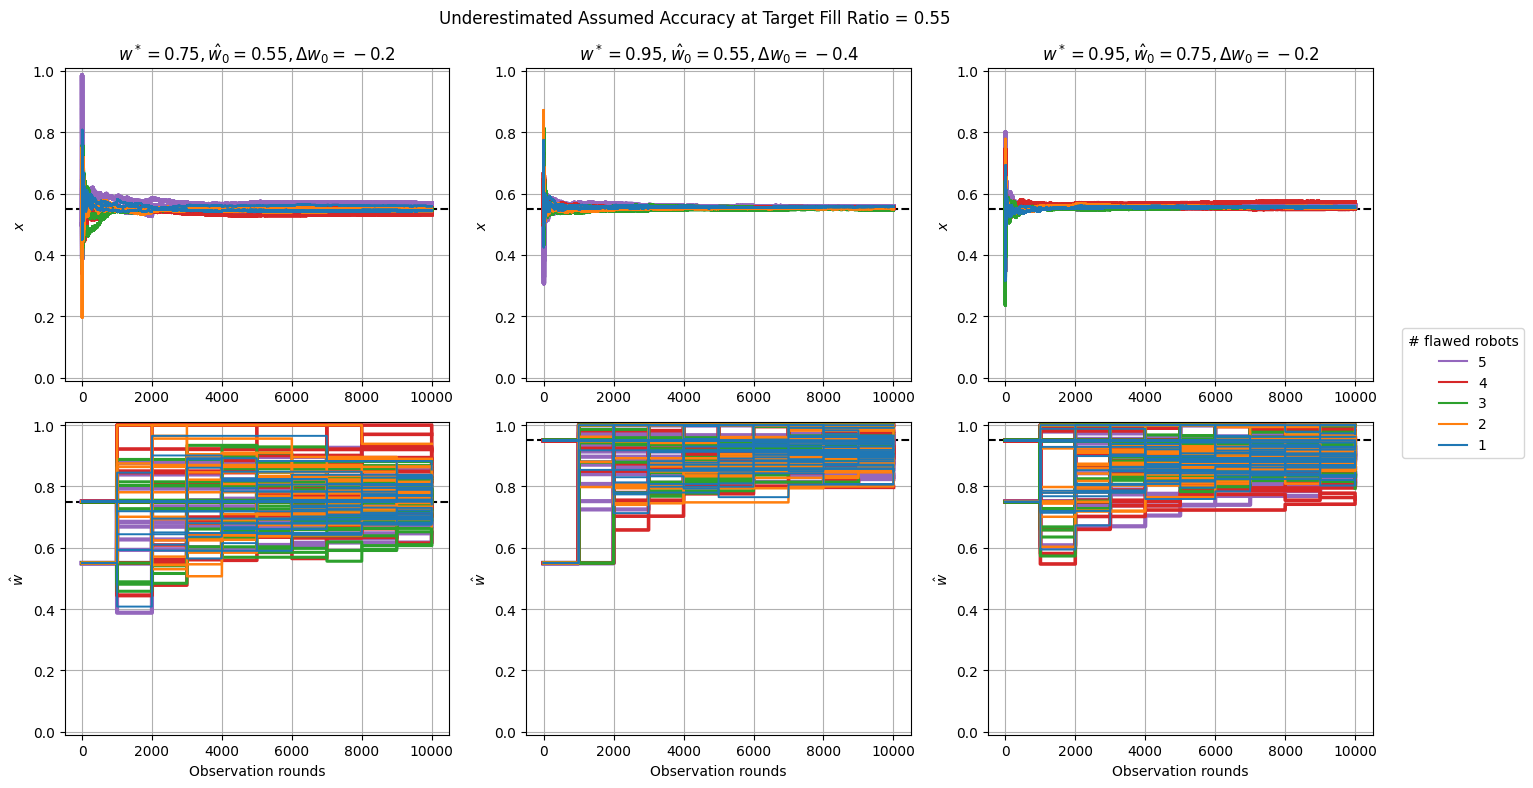

In [11]:
tfr = 0.55
plot_data(case2_under_tfr550_json_data, tfr, "Underestimated Assumed Accuracy at Target Fill Ratio = {0}".format(tfr))

Common parameter values:

num_trials: 3
num_robots: 10
num_correct_robots: [9, 7, 5, 8, 6]
num_flawed_robots: [1, 3, 5, 2, 4]
num_steps: 10000
sensor_filter_period: 1000
comms_period: 10
tfr: 0.75
flawed_sensor_acc_b: 0.55
flawed_sensor_acc_w: 0.55
correct_sensor_acc_b: 0.75
correct_sensor_acc_w: 0.75
fully_connected: True
correct_robot_filter: True
filter_specific_params: {'type2ErrProb': 0.1}


num_trials: 3
num_robots: 10
num_correct_robots: [9, 7, 5, 8, 6]
num_flawed_robots: [1, 3, 5, 2, 4]
num_steps: 10000
sensor_filter_period: 1000
comms_period: 10
tfr: 0.75
flawed_sensor_acc_b: 0.55
flawed_sensor_acc_w: 0.55
correct_sensor_acc_b: 0.95
correct_sensor_acc_w: 0.95
fully_connected: True
correct_robot_filter: True
filter_specific_params: {'type2ErrProb': 0.1}


num_trials: 3
num_robots: 10
num_correct_robots: [9, 7, 5, 8, 6]
num_flawed_robots: [1, 3, 5, 2, 4]
num_steps: 10000
sensor_filter_period: 1000
comms_period: 10
tfr: 0.75
flawed_sensor_acc_b: 0.75
flawed_sensor_acc_w: 0.75
cor

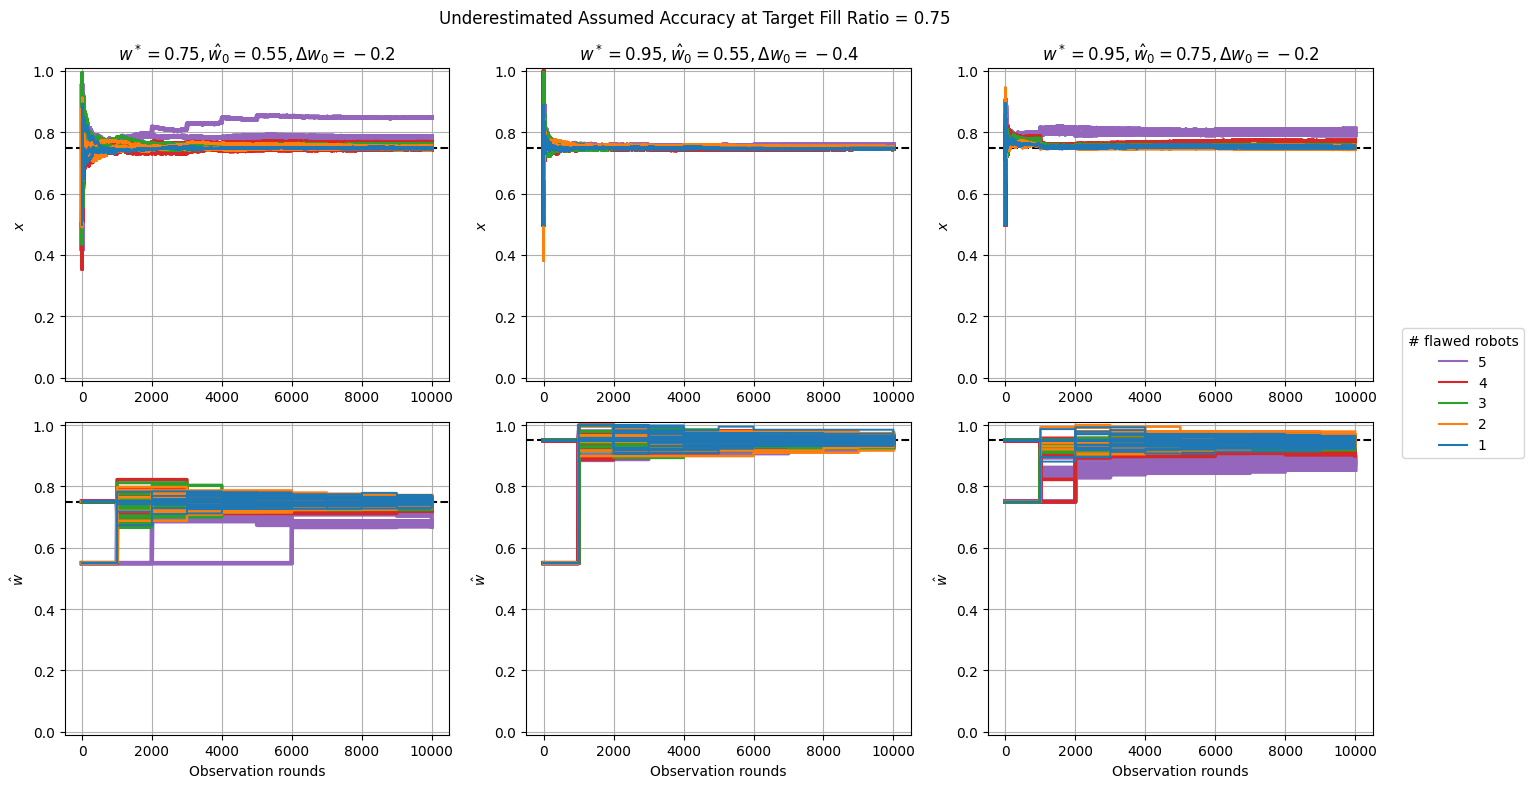

In [12]:
tfr = 0.75
plot_data(case2_under_tfr750_json_data, tfr, "Underestimated Assumed Accuracy at Target Fill Ratio = {0}".format(tfr))

Common parameter values:

num_trials: 3
num_robots: 10
num_correct_robots: [9, 7, 5, 8, 6]
num_flawed_robots: [1, 3, 5, 2, 4]
num_steps: 10000
sensor_filter_period: 1000
comms_period: 10
tfr: 0.95
flawed_sensor_acc_b: 0.55
flawed_sensor_acc_w: 0.55
correct_sensor_acc_b: 0.75
correct_sensor_acc_w: 0.75
fully_connected: True
correct_robot_filter: True
filter_specific_params: {'type2ErrProb': 0.1}


num_trials: 3
num_robots: 10
num_correct_robots: [9, 7, 5, 8, 6]
num_flawed_robots: [1, 3, 5, 2, 4]
num_steps: 10000
sensor_filter_period: 1000
comms_period: 10
tfr: 0.95
flawed_sensor_acc_b: 0.55
flawed_sensor_acc_w: 0.55
correct_sensor_acc_b: 0.95
correct_sensor_acc_w: 0.95
fully_connected: True
correct_robot_filter: True
filter_specific_params: {'type2ErrProb': 0.1}


num_trials: 3
num_robots: 10
num_correct_robots: [9, 7, 5, 8, 6]
num_flawed_robots: [1, 3, 5, 2, 4]
num_steps: 10000
sensor_filter_period: 1000
comms_period: 10
tfr: 0.95
flawed_sensor_acc_b: 0.75
flawed_sensor_acc_w: 0.75
cor

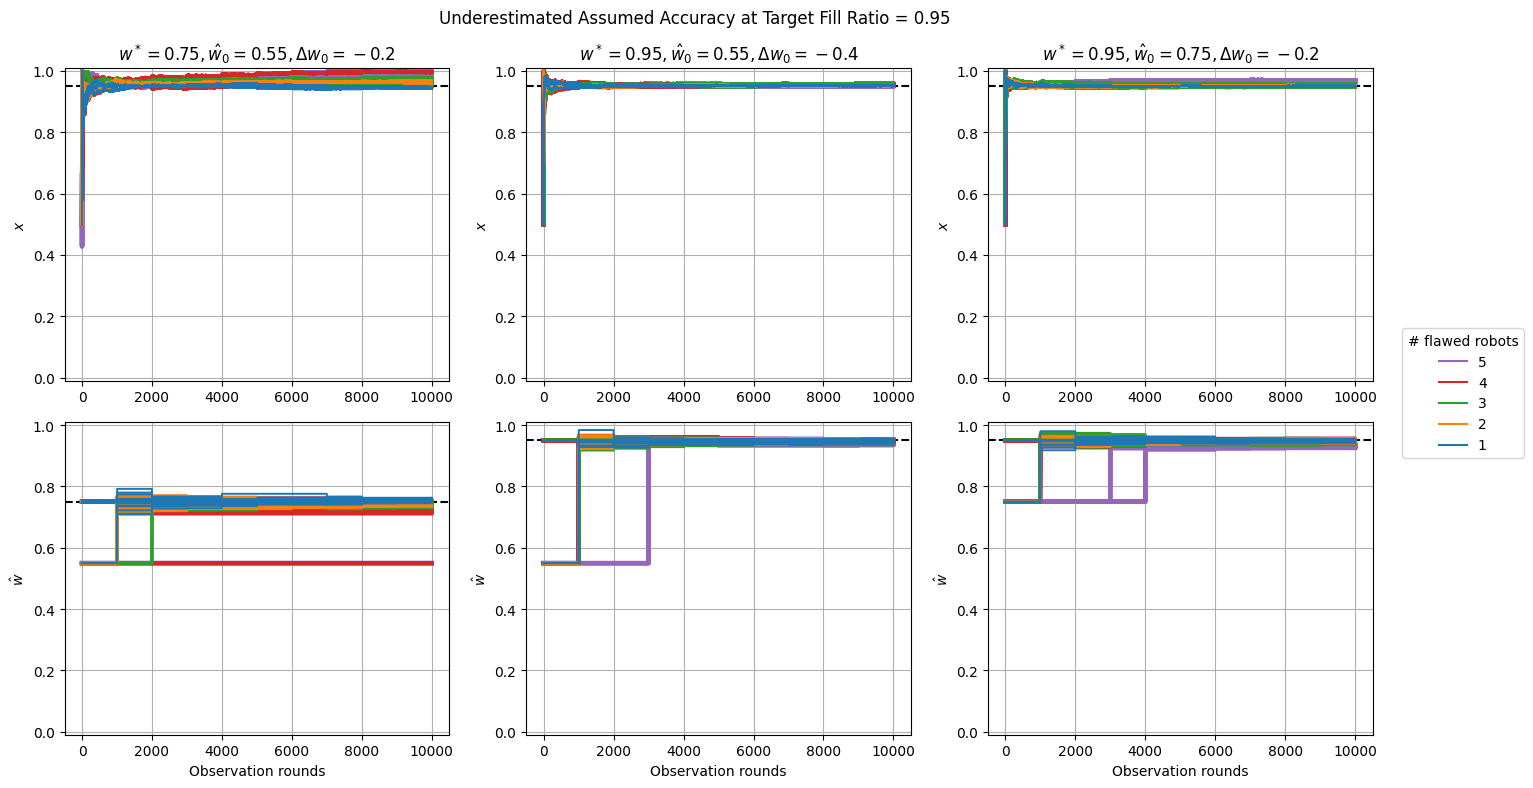

In [13]:
tfr = 0.95
plot_data(case2_under_tfr950_json_data, tfr, "Underestimated Assumed Accuracy at Target Fill Ratio = {0}".format(tfr))

#### Case 2b: Overestimated Initial Accuracy

Robots' assumed initial accuracy is underestimated.

Common parameter values:

num_trials: 3
num_robots: 10
num_correct_robots: [9, 7, 5, 8, 6]
num_flawed_robots: [1, 3, 5, 2, 4]
num_steps: 10000
sensor_filter_period: 1000
comms_period: 10
tfr: 0.55
flawed_sensor_acc_b: 0.75
flawed_sensor_acc_w: 0.75
correct_sensor_acc_b: 0.55
correct_sensor_acc_w: 0.55
fully_connected: True
correct_robot_filter: True
filter_specific_params: {'type2ErrProb': 0.1}


num_trials: 3
num_robots: 10
num_correct_robots: [9, 7, 5, 8, 6]
num_flawed_robots: [1, 3, 5, 2, 4]
num_steps: 10000
sensor_filter_period: 1000
comms_period: 10
tfr: 0.55
flawed_sensor_acc_b: 0.95
flawed_sensor_acc_w: 0.95
correct_sensor_acc_b: 0.55
correct_sensor_acc_w: 0.55
fully_connected: True
correct_robot_filter: True
filter_specific_params: {'type2ErrProb': 0.1}


num_trials: 3
num_robots: 10
num_correct_robots: [9, 7, 5, 8, 6]
num_flawed_robots: [1, 3, 5, 2, 4]
num_steps: 10000
sensor_filter_period: 1000
comms_period: 10
tfr: 0.55
flawed_sensor_acc_b: 0.95
flawed_sensor_acc_w: 0.95
cor

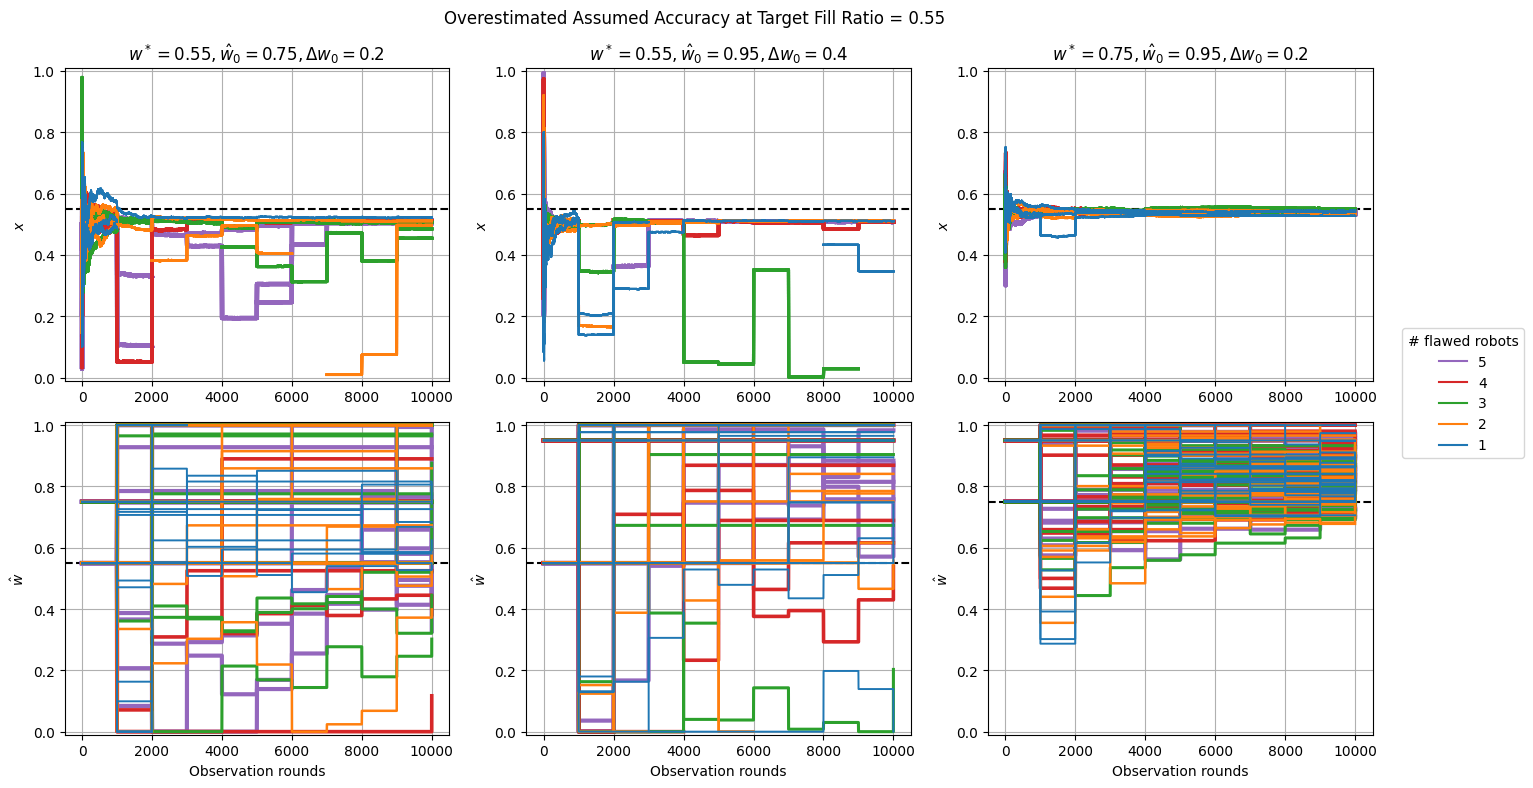

In [14]:
tfr = 0.55
plot_data(case2_over_tfr550_json_data, tfr, "Overestimated Assumed Accuracy at Target Fill Ratio = {0}".format(tfr))

Common parameter values:

num_trials: 3
num_robots: 10
num_correct_robots: [9, 7, 5, 8, 6]
num_flawed_robots: [1, 3, 5, 2, 4]
num_steps: 10000
sensor_filter_period: 1000
comms_period: 10
tfr: 0.75
flawed_sensor_acc_b: 0.75
flawed_sensor_acc_w: 0.75
correct_sensor_acc_b: 0.55
correct_sensor_acc_w: 0.55
fully_connected: True
correct_robot_filter: True
filter_specific_params: {'type2ErrProb': 0.1}


num_trials: 3
num_robots: 10
num_correct_robots: [9, 7, 5, 8, 6]
num_flawed_robots: [1, 3, 5, 2, 4]
num_steps: 10000
sensor_filter_period: 1000
comms_period: 10
tfr: 0.75
flawed_sensor_acc_b: 0.95
flawed_sensor_acc_w: 0.95
correct_sensor_acc_b: 0.55
correct_sensor_acc_w: 0.55
fully_connected: True
correct_robot_filter: True
filter_specific_params: {'type2ErrProb': 0.1}


num_trials: 3
num_robots: 10
num_correct_robots: [9, 7, 5, 8, 6]
num_flawed_robots: [1, 3, 5, 2, 4]
num_steps: 10000
sensor_filter_period: 1000
comms_period: 10
tfr: 0.75
flawed_sensor_acc_b: 0.95
flawed_sensor_acc_w: 0.95
cor

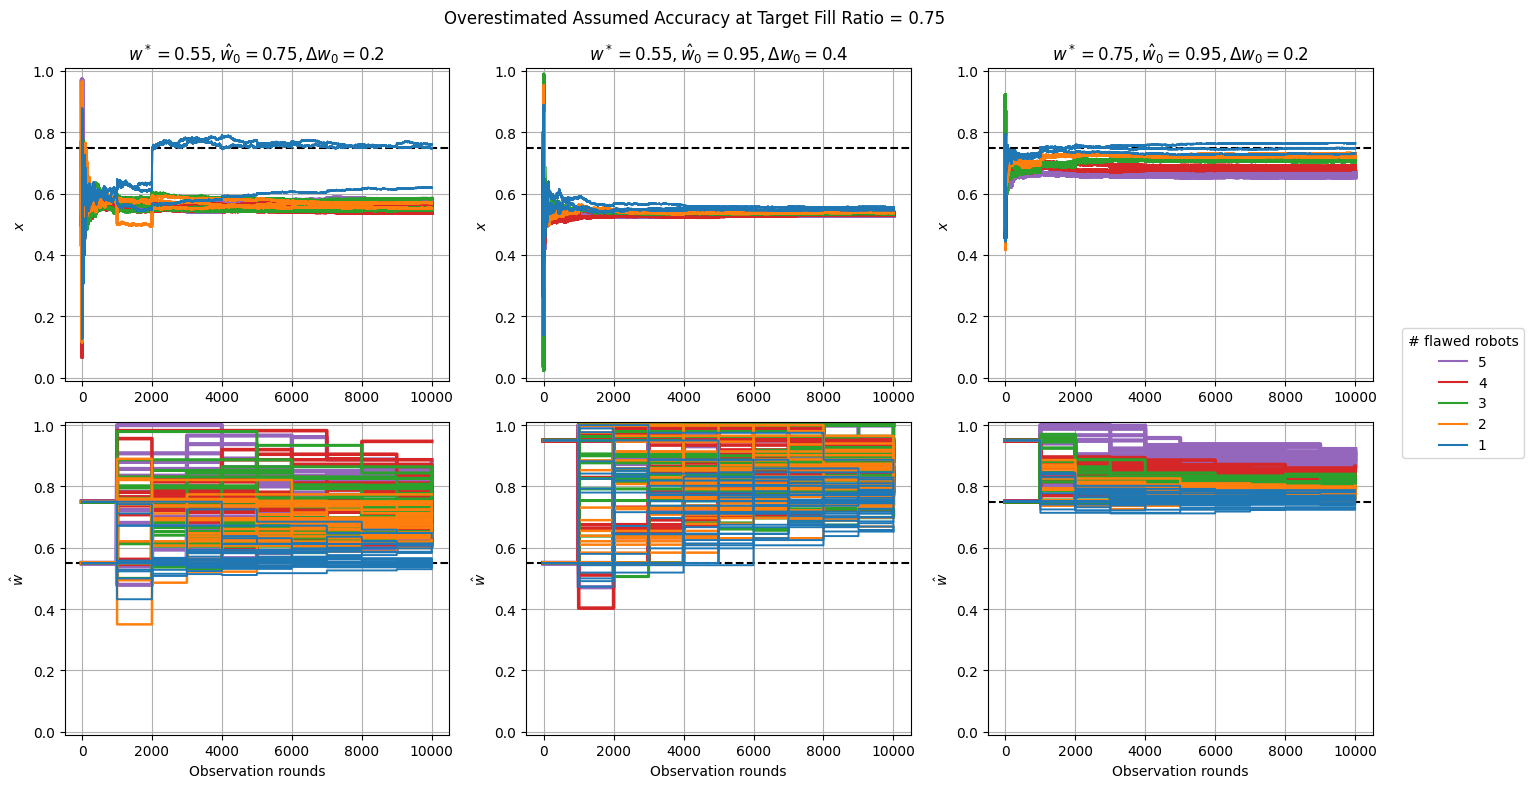

In [15]:
tfr = 0.75
plot_data(case2_over_tfr750_json_data, tfr, "Overestimated Assumed Accuracy at Target Fill Ratio = {0}".format(tfr))

Common parameter values:

num_trials: 3
num_robots: 10
num_correct_robots: [9, 7, 5, 8, 6]
num_flawed_robots: [1, 3, 5, 2, 4]
num_steps: 10000
sensor_filter_period: 1000
comms_period: 10
tfr: 0.95
flawed_sensor_acc_b: 0.75
flawed_sensor_acc_w: 0.75
correct_sensor_acc_b: 0.55
correct_sensor_acc_w: 0.55
fully_connected: True
correct_robot_filter: True
filter_specific_params: {'type2ErrProb': 0.1}


num_trials: 3
num_robots: 10
num_correct_robots: [9, 7, 5, 8, 6]
num_flawed_robots: [1, 3, 5, 2, 4]
num_steps: 10000
sensor_filter_period: 1000
comms_period: 10
tfr: 0.95
flawed_sensor_acc_b: 0.95
flawed_sensor_acc_w: 0.95
correct_sensor_acc_b: 0.55
correct_sensor_acc_w: 0.55
fully_connected: True
correct_robot_filter: True
filter_specific_params: {'type2ErrProb': 0.1}


num_trials: 3
num_robots: 10
num_correct_robots: [9, 7, 5, 8, 6]
num_flawed_robots: [1, 3, 5, 2, 4]
num_steps: 10000
sensor_filter_period: 1000
comms_period: 10
tfr: 0.95
flawed_sensor_acc_b: 0.95
flawed_sensor_acc_w: 0.95
cor

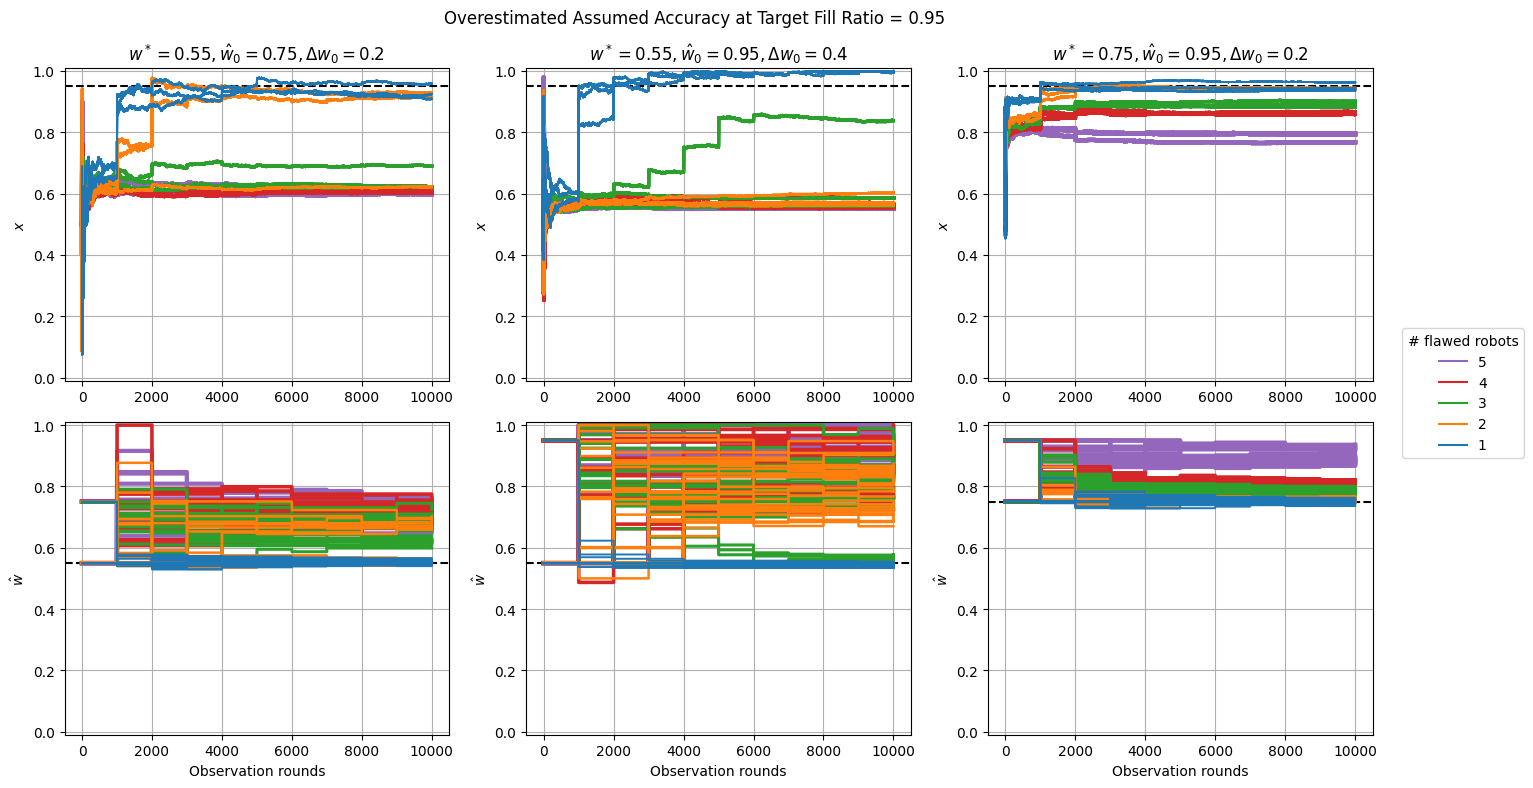

In [16]:
tfr = 0.95
plot_data(case2_over_tfr950_json_data, tfr, "Overestimated Assumed Accuracy at Target Fill Ratio = {0}".format(tfr))